In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

In [3]:
images.shape

(2, 427, 640, 3)

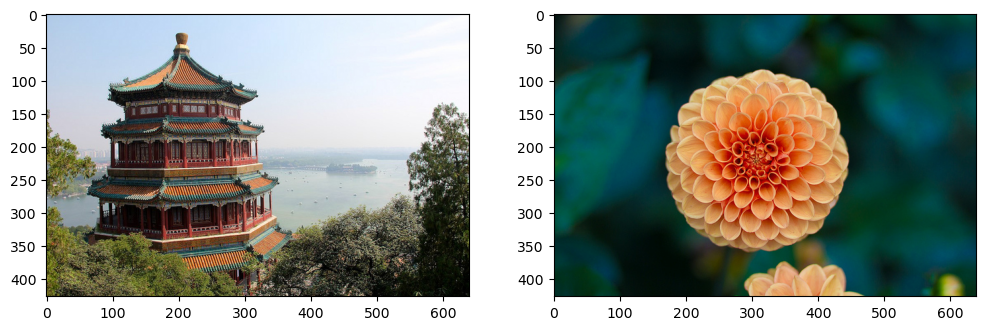

In [4]:
_, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(images[0, :, :, :])
ax[1].imshow(images[1, :, :, :])
plt.show()

In [5]:
batch_size, height, width, channels = images.shape
print(f"batch size = {batch_size}")
print(f"height = {height}")
print(f"width = {width}")
print(f"channels = {channels}")

batch size = 2
height = 427
width = 640
channels = 3


## Create the Model

In [6]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 4s 0us/step


In [7]:
images_resized = tf.image.resize(images, [224, 224])

In [8]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [9]:
Y_proba = model.predict(inputs)

2023-03-14 15:57:18.376834: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 476ms/step


In [16]:
top_k = keras.applications.resnet50.decode_predictions(Y_proba, top=5)
top_k[0]

[('n02825657', 'bell_cote', 0.8234868),
 ('n03877845', 'palace', 0.06751667),
 ('n03781244', 'monastery', 0.04188353),
 ('n02980441', 'castle', 0.031552214),
 ('n03028079', 'church', 0.010028282)]

In [17]:
top_k[1]

[('n03530642', 'honeycomb', 0.49828205),
 ('n13040303', 'stinkhorn', 0.33955038),
 ('n02206856', 'bee', 0.04346381),
 ('n11939491', 'daisy', 0.032279328),
 ('n12985857', 'coral_fungus', 0.026560308)]